In [3]:
!pip install torch matplotlib numpy

     -------------------------------------- 192.3/192.3 MB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 21.0 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 19.3 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 17.0 MB/s eta 0:00:00


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [46]:
from pathlib import Path
import json
import os

In [70]:
MONSTER_LIST = ['Creeper', 'Skeleton', 'Spider', 'Zombie']
avg_reward_per_monster = {
    "Creeper": [0],
    "Skeleton": [0],
    "Spider": [0],
    "Zombie": [0]
}
avg_remaining_hp_per_monster = {
    "Creeper": [],
    "Skeleton": [],
    "Spider": [],
    "Zombie": []
}
winrate_per_monster = {
    "Creeper": (0, 0),
    "Skeleton": (0, 0),
    "Spider": (0, 0),
    "Zombie": (0, 0)
}
wrs = {
    "Creeper": [],
    "Skeleton": [],
    "Spider": [],
    "Zombie": []
}

In [71]:
# script_dir = Path(__file__).parent
script_dir = Path(os.path.abspath(''))
for episode in range(100, 4500, 100):
    with script_dir.joinpath('stats', f'stats-checkpoint-{episode}.json').open(mode='r') as eval_data:
        e_data = json.load(eval_data)
        for monster in MONSTER_LIST:
            # print(np.mean(e_data['rewards_per_monster'][monster]))
            # print(np.mean(e_data['remaining_agent_hp_per_monster'][monster]))
            # print(e_data['winrates_per_monster'][monster])
            avg_reward_per_monster[monster].append(np.mean(e_data['rewards_per_monster'][monster]))
            avg_remaining_hp_per_monster[monster].append(np.mean(e_data['remaining_agent_hp_per_monster'][monster]))
            winrate_per_monster[monster] = (
                winrate_per_monster[monster][0] + e_data['winrates_per_monster'][monster][0],
                winrate_per_monster[monster][1] + e_data['winrates_per_monster'][monster][1]
            )
            wrs[monster].append(winrate_per_monster[monster][0]/winrate_per_monster[monster][1]*100)

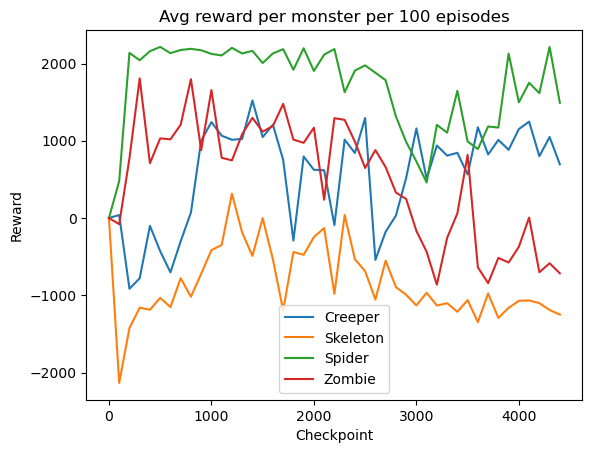

In [72]:
checkpoints = list(range(100, 4500, 100))
fig, axes = plt.subplots()

for monster in MONSTER_LIST:
    axes.plot([0] + checkpoints, avg_reward_per_monster[monster], label=monster)

axes.set_xlabel('Checkpoint')
axes.set_ylabel('Reward')
axes.set_title('Avg reward per monster per 100 episodes')
axes.legend();

# for monster in MONSTER_LIST:
#     axes[0].plot(checkpoints, avg_reward_per_monster[monster], label=monster)
#     axes[1].plot(checkpoints, avg_remaining_hp_per_monster[monster], label=monster)
#     axes[2].plot(checkpoints, wrs[monster], label=monster)

# axes[0].set_xlabel('Checkpoint')
# axes[0].set_ylabel('Reward')
# axes[0].set_title('Avg reward per monster per 100 episodes')
# axes[0].legend();

# axes[1].set_xlabel('Checkpoint')
# axes[1].set_ylabel('Average health')
# axes[1].set_title('Avg post-episode health per 100 episodes')
# axes[1].legend();

# axes[2].set_xlabel('Checkpoint')
# axes[2].set_ylabel('Winrate')
# axes[2].set_title('Winrate per monster per 100 episodes')
# axes[2].legend();

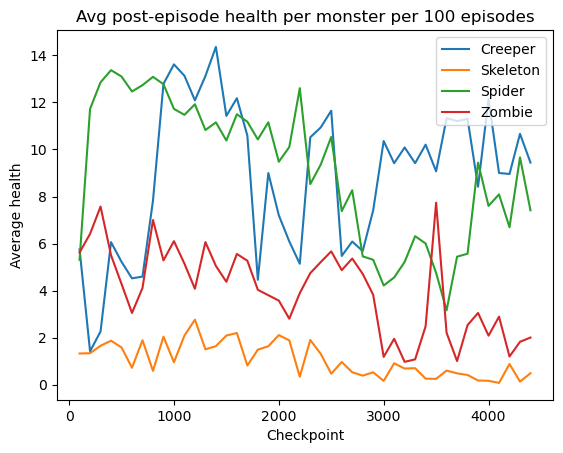

In [73]:
fig, axes = plt.subplots()

for monster in MONSTER_LIST:
    axes.plot(checkpoints, avg_remaining_hp_per_monster[monster], label=monster)

axes.set_xlabel('Checkpoint')
axes.set_ylabel('Average health')
axes.set_title('Avg post-episode health per monster per 100 episodes')
axes.legend();

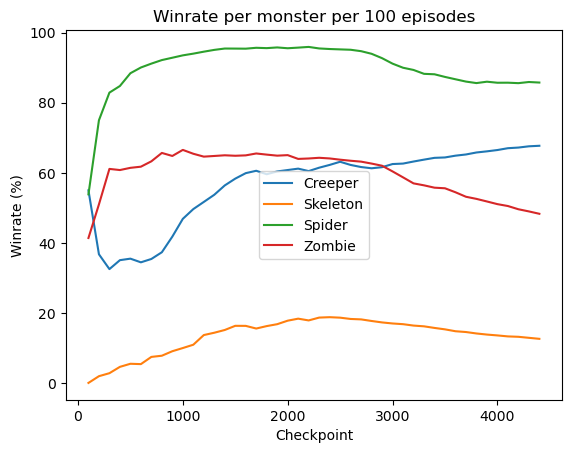

In [74]:
fig, axes = plt.subplots()

for monster in MONSTER_LIST:
    axes.plot(checkpoints, wrs[monster], label=monster)

axes.set_xlabel('Checkpoint')
axes.set_ylabel('Winrate (%)')
axes.set_title('Winrate per monster per 100 episodes')
axes.legend();